<>:330: SyntaxWarning: invalid escape sequence '\p'
<>:330: SyntaxWarning: invalid escape sequence '\p'
C:\Users\LINCOLN BASSEY\AppData\Local\Temp\ipykernel_21640\2702570325.py:330: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(alpha_deg, C_L_theory, 'k--', linewidth=2.0, label='Theoretical $C_L = 2\pi\\alpha$')
C:\Users\LINCOLN BASSEY\AppData\Local\Temp\ipykernel_21640\2702570325.py:38: RuntimeWarning: invalid value encountered in divide
  F_stat = U*(z1_cylinder_mesh_masked + a**2/z1_cylinder_mesh_masked) - 1j*(Gamma_stat/(2*np.pi))*np.log(z1_cylinder_mesh_masked)
C:\Users\LINCOLN BASSEY\AppData\Local\Temp\ipykernel_21640\2702570325.py:38: RuntimeWarning: invalid value encountered in log
  F_stat = U*(z1_cylinder_mesh_masked + a**2/z1_cylinder_mesh_masked) - 1j*(Gamma_stat/(2*np.pi))*np.log(z1_cylinder_mesh_masked)
C:\Users\LINCOLN BASSEY\AppData\Local\Temp\ipykernel_21640\2702570325.py:42: RuntimeWarning: invalid value encountered in divide
  F_rot = U*(z1_cylinder_mesh_mas

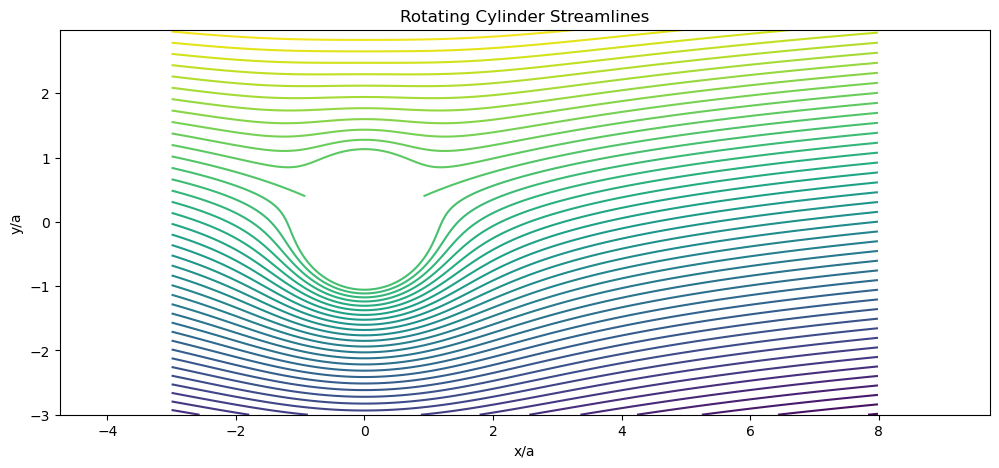

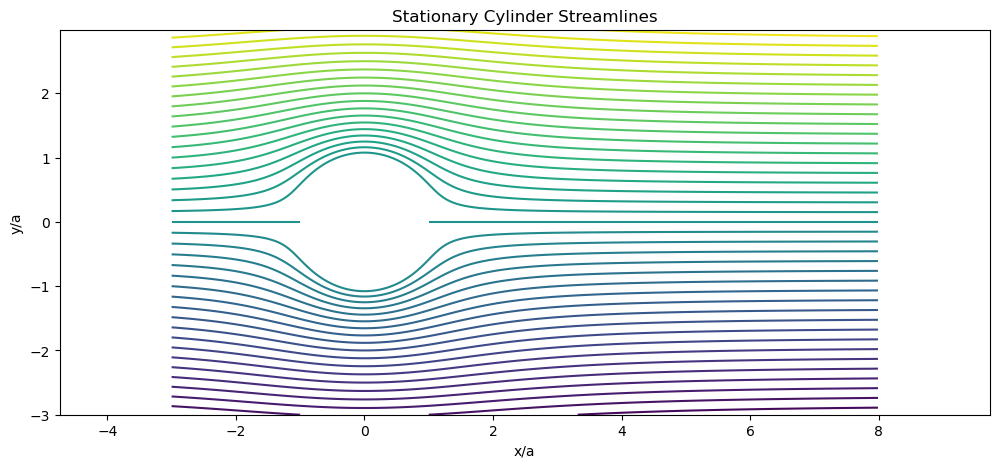

Chord length c = 4.13332843933599


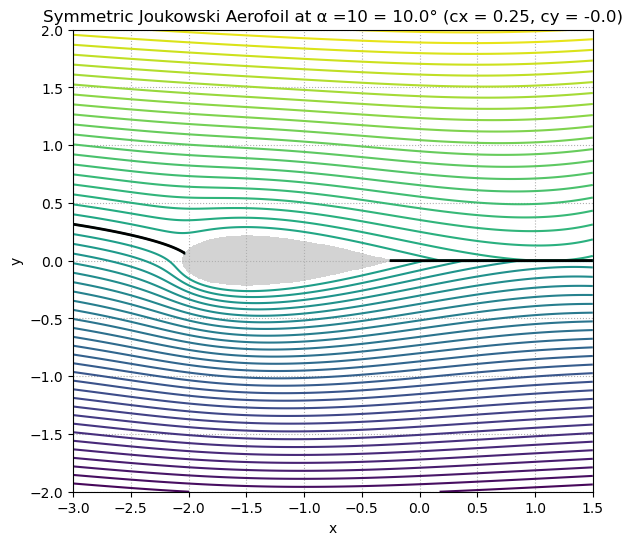

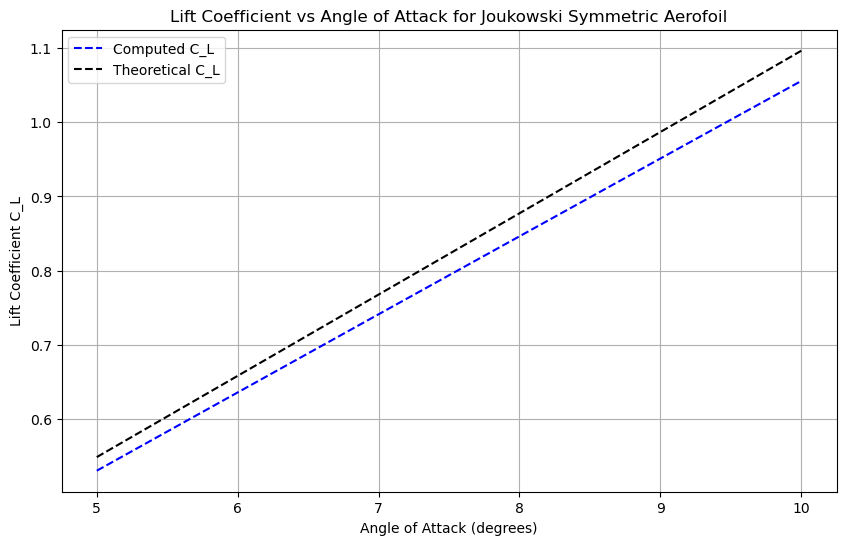

Chord length c = 4.034814094370335


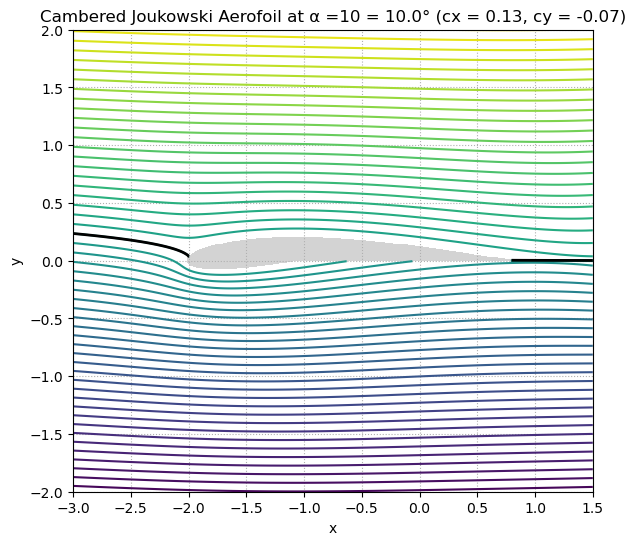

Zero-lift angle (theoretical) α0 = 4.600°


<Figure size 1000x600 with 0 Axes>

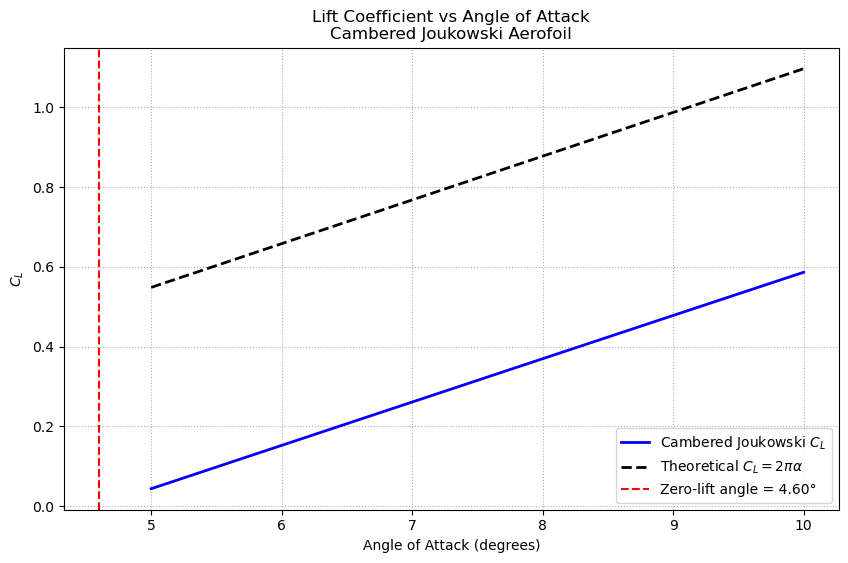

In [1]:
#-------------------------------------------
# CODE FOR STREAMLINES OF A ROTATING AND STATIONARY CYLINDER WITH CIRCULATION Γ
#-------------------------------------------

import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# PARAMETERS
# -----------------------------------------------------------
a = 1.0          # Radius of the cylinder/characteristic length [m]
U = 1.0          # Freestream velocity [m/s]
Gamma_rot = 5.0 # Circulation for rotating cylinder [m^2/s]
Gamma_stat = 0.0 # Circulation for stationary cylinder [m^2/s]

mu = 2*np.pi*U*a**2

# -----------------------------------------------------------
# MESH (z1-plane for cylinder)
# -----------------------------------------------------------
delta = 0.01
x = np.arange(-3*a, 8*a, delta*a)
y = np.arange(-3*a, 3*a, delta*a)
X, Y = np.meshgrid(x, y)

z1_cylinder_mesh = X + 1j*Y 
r_cylinder_mesh = np.sqrt(X**2 + Y**2)

# Mask cylinder interior for cylinder plots
mask_cylinder = r_cylinder_mesh < a
z1_cylinder_mesh_masked = np.copy(z1_cylinder_mesh)
z1_cylinder_mesh_masked[mask_cylinder] = np.nan + 1j*np.nan

# -----------------------------------------------------------
# CYLINDER COMPLEX POTENTIAL CALCULATION
# -----------------------------------------------------------
# Stationary Cylinder
F_stat = U*(z1_cylinder_mesh_masked + a**2/z1_cylinder_mesh_masked) - 1j*(Gamma_stat/(2*np.pi))*np.log(z1_cylinder_mesh_masked)
Psi_stat = np.imag(F_stat)/(U*a)

# Rotating Cylinder
F_rot = U*(z1_cylinder_mesh_masked + a**2/z1_cylinder_mesh_masked) - 1j*(Gamma_rot/(2*np.pi))*np.log(z1_cylinder_mesh_masked)
Psi_rot = np.imag(F_rot)/(U*a)



# -----------------------------------------------------------
# PLOTS
# -----------------------------------------------------------

# Plot 1: Rotating Cylinder
plt.figure(figsize=(12,5))
plt.contour(X/a, Y/a, Psi_rot, 50, cmap='viridis')
plt.title("Rotating Cylinder Streamlines")
plt.xlabel("x/a"); plt.ylabel("y/a")
plt.axis("equal")
plt.show()

# Plot 2: Stationary Cylinder
plt.figure(figsize=(12,5))
plt.contour(X/a, Y/a, Psi_stat, 50, cmap='viridis')
plt.title("Stationary Cylinder Streamlines")
plt.xlabel("x/a"); plt.ylabel("y/a")
plt.axis("equal")
plt.show()



#-------------------------------------------
# CODE FOR SYMMETRIC AEROFOIL
#-------------------------------------------


import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# PARAMETERS
# -----------------------------------------------------------
a = 1.0          # radius of circle used for mapping
U = 1.0          # freestream velocity
alpha_deg_plot = 10.0  # angle of attack in degrees


# OFFSET CO-ORDINATES FOR AEROFOIL SHAPE
c_x = 0.25   # horizontal offset (controls trailing edge sharpness)
c_y = -0.0 # vertical offset (controls thickness)



# -----------------------------------------------------------
# MESH IN THE Z2-PLANE (aerofoil plane)
# -----------------------------------------------------------
x2 = np.linspace(-3, 1.5, 500)
y2 = np.linspace(-2, 2, 500)
X2, Y2 = np.meshgrid(x2, y2)
z2 = X2 + 1j * Y2
# parameter around circle in z1-plane
theta = np.linspace(0, 2*np.pi, 2000)




# -----------------------------------------------------------
#KUTTA CONDITION PARAMETERS
# -----------------------------------------------------------
B = np.arctan2(c_y , (1-c_x) )
alpha_rad_plot = np.deg2rad(alpha_deg_plot)
# circulation from Kutta condition
Gamma = 4*np.pi*U*np.sin((alpha_rad_plot)+B)

# INVERSE JOUKOWSKI TRANSFORMATION
# -----------------------------------------------------------
sqrt_term = np.sqrt(z2**2 - 4 * a**2)

z1_plus  = 0.5 * (z2 + sqrt_term)
z1_minus = 0.5 * (z2 - sqrt_term)

# Choose exterior branch
z1_raw = np.where(np.abs(z1_plus) > np.abs(z1_minus), z1_plus, z1_minus)

# -----------------------------------------------------------
# APPLY OFFSETS TO SHAPE THE AIRFOIL
# -----------------------------------------------------------
z1 = z1_raw + c_x + 1j*c_y
# circle center with offsets
z1_center = c_x + 1j*c_y

# points on circle in z1-plane (shifted)
z1_boundary = z1_center + a * np.exp(1j*theta)

# map to airfoil plane via Joukowski transform
z2_boundary = z1_boundary + a**2 / z1_boundary

# real part gives x-coordinates of airfoil surface
x_boundary = np.real(z2_boundary)

# chord length = max x - min x
c = x_boundary.max() - x_boundary.min()
print("Chord length c =", c)
r1 = np.abs(z1)
inside = r1 < a

# -----------------------------------------------------------
# COMPLEX POTENTIAL IN Z1 PLANE
# -----------------------------------------------------------
F = U * (z1 + a**2 / z1) - 1j * (Gamma / (2*np.pi)) * np.log(z1)
Psi = np.imag(F) / (U * a)

Psi[inside] = np.nan

# -----------------------------------------------------------
# PLOTTING
# -----------------------------------------------------------
plt.figure(figsize=(12, 6))
ax = plt.gca()

# Fill interior of the aerofoil
ax.contourf(np.real(z2)/a, np.imag(z2)/a, inside.astype(float),
            levels=[0.5, 1.5], colors=["lightgray"])

# Uniform flow Streamlines
ax.contour(np.real(z2), np.imag(z2), Psi, levels=60, cmap="viridis")

# Boundary streamline of the aerofoil  shape (Ψ = 0)
ax.contour(np.real(z2), np.imag(z2), Psi, levels=[0], colors="black", linewidths=2.0)

ax.set_aspect("equal")
ax.set_title("Symmetric Joukowski Aerofoil at α =10 = {alpha_deg}° (cx = {}, cy = {})".format(c_x, c_y, alpha_deg=alpha_deg_plot))
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.grid(True, linestyle=":")
plt.show()

alpha_deg = np.linspace(5, 10, 15)  # angle of attack in degrees
alpha_rad = np.deg2rad(alpha_deg)
# equation for lift coefficient from Kutta condition
C_L = 2  * 4*np.pi*U*np.sin((alpha_rad)+B)/ ( U * c)

# equation for theoretical thin airfoil line (small angle approx)
C_L_theory = 2 * np.pi *  (alpha_rad)

# Plot lift coefficient vs angle of attack
plt.figure(figsize=(10, 6))
# use format strings for color and linestyle (marker expects a single marker style)
plt.plot(alpha_deg, C_L, 'b--', label='Computed C_L')
plt.plot(alpha_deg, C_L_theory, 'k--', label='Theoretical C_L')
plt.title('Lift Coefficient vs Angle of Attack for Joukowski Symmetric Aerofoil')
plt.xlabel('Angle of Attack (degrees)')
plt.ylabel('Lift Coefficient C_L')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------------------------------------



#-------------------------------------------
# CODE FOR CAMBERED AEROFOIL
#-------------------------------------------


import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# PARAMETERS
# -----------------------------------------------------------
a = 1.0          # radius of circle used for mapping
U = 1.0          # freestream velocity
alpha_deg_plot = 10.0  # angle of attack in degrees


# OFFSET CO-ORDINATES FOR AEROFOIL SHAPE
c_x = 0.13   # horizontal offset (controls trailing edge sharpness)
c_y = -0.07 # vertical offset (controls thickness)



# -----------------------------------------------------------
# MESH IN THE Z2-PLANE (aerofoil plane)
# -----------------------------------------------------------
x2 = np.linspace(-3, 1.5, 500)
y2 = np.linspace(-2, 2, 500)
X2, Y2 = np.meshgrid(x2, y2)
z2 = X2 + 1j * Y2
# parameter around circle in z1-plane
theta = np.linspace(0, 2*np.pi, 2000)




# -----------------------------------------------------------
#KUTTA CONDITION PARAMETERS
# -----------------------------------------------------------
B = np.arctan2(c_y , (1-c_x) )
alpha_rad_plot = np.deg2rad(alpha_deg_plot)
# circulation from Kutta condition
Gamma = 4*np.pi*U*np.sin((alpha_rad_plot)+B)

# INVERSE JOUKOWSKI TRANSFORMATION
# -----------------------------------------------------------
sqrt_term = np.sqrt(z2**2 - 4 * a**2)

z1_plus  = 0.5 * (z2 + sqrt_term)
z1_minus = 0.5 * (z2 - sqrt_term)

# Choose exterior branch
z1_raw = np.where(np.abs(z1_plus) > np.abs(z1_minus), z1_plus, z1_minus)

# -----------------------------------------------------------
# APPLY OFFSETS TO SHAPE THE AIRFOIL
# -----------------------------------------------------------
z1 = z1_raw + c_x + 1j*c_y
# circle center with offsets
z1_center = c_x + 1j*c_y

# points on circle in z1-plane (shifted)
z1_boundary = z1_center + a * np.exp(1j*theta)

# map to airfoil plane via Joukowski transform
z2_boundary = z1_boundary + a**2 / z1_boundary

# real part gives x-coordinates of airfoil surface
x_boundary = np.real(z2_boundary)

# chord length = max x - min x
c = x_boundary.max() - x_boundary.min()
print("Chord length c =", c)
r1 = np.abs(z1)
inside = r1 < a

# -----------------------------------------------------------
# COMPLEX POTENTIAL IN Z1 PLANE
# -----------------------------------------------------------
F = U * (z1 + a**2 / z1) - 1j * (Gamma / (2*np.pi)) * np.log(z1)
Psi = np.imag(F) / (U * a)

Psi[inside] = np.nan

# -----------------------------------------------------------
# PLOTTING
# -----------------------------------------------------------
plt.figure(figsize=(12, 6))
ax = plt.gca()

# Fill interior of the aerofoil
ax.contourf(np.real(z2)/a, np.imag(z2)/a, inside.astype(float),
            levels=[0.5, 1.5], colors=["lightgray"])

# Uniform flow Streamlines
ax.contour(np.real(z2), np.imag(z2), Psi, levels=60, cmap="viridis")

# Boundary streamline of the aerofoil  shape (Ψ = 0)
ax.contour(np.real(z2), np.imag(z2), Psi, levels=[0], colors="black", linewidths=2.0)

ax.set_aspect("equal")
ax.set_title("Cambered Joukowski Aerofoil at α =10 = {alpha_deg}° (cx = {}, cy = {})".format(c_x, c_y, alpha_deg=alpha_deg_plot))
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.grid(True, linestyle=":")
plt.show()

alpha_deg = np.linspace(5, 10, 15)  # angle of attack in degrees
alpha_rad = np.deg2rad(alpha_deg)
# equation for lift coefficient from Kutta condition
C_L = 2  * 4*np.pi*U*np.sin((alpha_rad)+B)/ ( U * c)

# equation for theoretical thin airfoil line (small angle approx)
C_L_theory = 2 * np.pi *  (alpha_rad)

# Plot lift coefficient vs angle of attack
plt.figure(figsize=(10, 6))


# -----------------------------------------------------------
# FIND ZERO-LIFT ANGLE
# -----------------------------------------------------------
# zero-lift occurs when Gamma = 0 → α0 = -B
alpha_0 = -np.rad2deg(B)
print(f"Zero-lift angle (theoretical) α0 = {alpha_0:.3f}°")

# -----------------------------------------------------------
# STEP 5 — PLOT
# -----------------------------------------------------------
plt.figure(figsize=(10, 6))

plt.plot(alpha_deg, C_L, 'b-', linewidth=2.0, label='Cambered Joukowski $C_L$')
plt.plot(alpha_deg, C_L_theory, 'k--', linewidth=2.0, label='Theoretical $C_L = 2\pi\\alpha$')

# mark zero-lift crossing
plt.axvline(alpha_0, color='red', linestyle='--', label=f'Zero-lift angle = {alpha_0:.2f}°')

plt.title("Lift Coefficient vs Angle of Attack\nCambered Joukowski Aerofoil")
plt.xlabel("Angle of Attack (degrees)")
plt.ylabel("$C_L$")
plt.grid(True, linestyle=':')
plt.legend()
plt.show()



Chord length c = 4.13332843933599


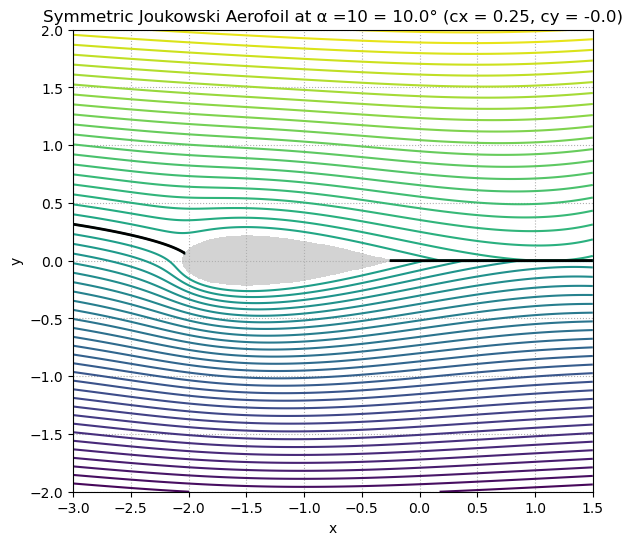

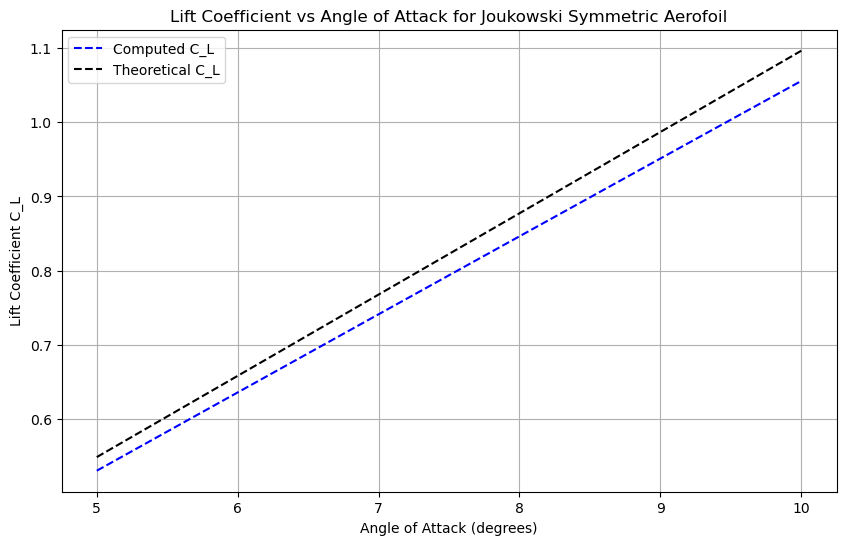

<>:132: SyntaxWarning: invalid escape sequence '\p'
<>:132: SyntaxWarning: invalid escape sequence '\p'
C:\Users\LINCOLN BASSEY\AppData\Local\Temp\ipykernel_12676\2664732347.py:132: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(alpha_deg, C_L_theory, 'k--', linewidth=2.0, label='Theoretical $C_L = 2\pi\\alpha$')


Chord length c = 4.034814094370335


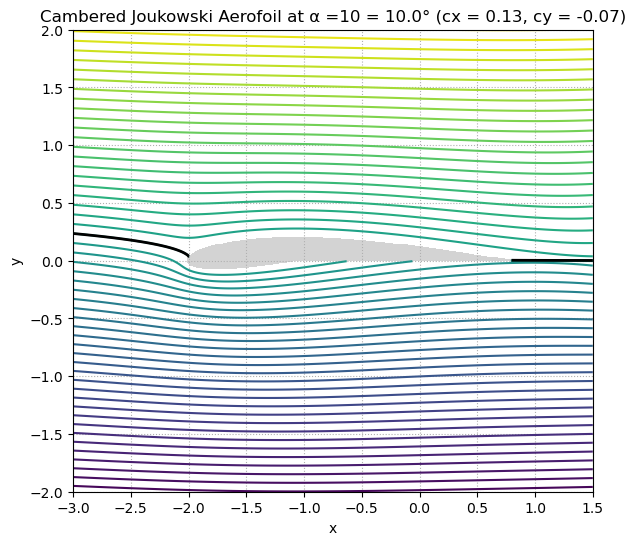

Zero-lift angle (theoretical) α0 = 4.600°


<Figure size 1000x600 with 0 Axes>

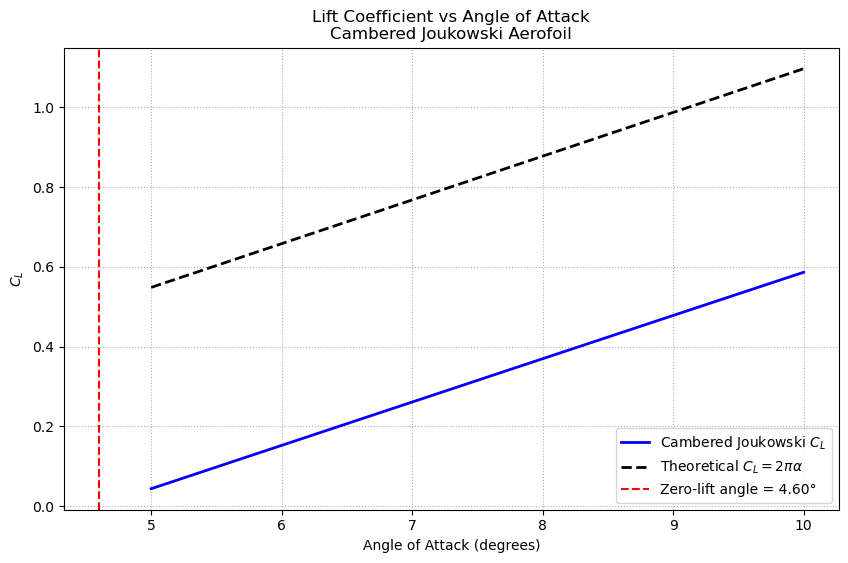